In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 7, 10, 13]
SUBJECT = "Brian"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_B.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/14 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
(8532, 4, 14, 1) (8532,) (86, 4, 14, 1) (86,)
Dataset 2/14 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
second (8532, 4, 14, 1) (8532,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 82.85%
Maximum validation accuracy : 81.4%
Accuracy of test dataset using model V0: 81.3953%
Dataset 3/14 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.0528%
Dataset 4/14 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 81.3479%
Dataset 5/14 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.2054%
Dataset 6/14 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.3058%
Dataset 7/14 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.2001%
Dataset 8/14 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.8420%
Dataset 9/14 - Session Exp_2025-07-17-v1/E9AD0E

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_B.csv')

In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/14 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 81.09%
Maximum validation accuracy : 82.34%

Dataset 2/14 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.25%
Maximum validation accuracy : 90.49%

Dataset 3/14 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 92.22%
Maximum validation accuracy : 94.24%

Dataset 4/14 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.84%
Maximum validation accuracy : 90.49%

Dataset 5/14 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 92.62%
Maximum validatio

In [5]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 10.92%
Average of acc using previous test data after training: 82.74%
Average of acc using current test data after training: 92.49%
K-1: 82.48% | Target: 93.27
K-4: 84.64% | Target: 93.73
K-7: 92.67% | Target: 94.15
K-10: 92.90% | Target: 94.11
K-13: 92.67% | Target: 91.00


In [22]:
np.array(baseline_result['Info'])

array(['Stand (6/27)', 'Sit_chair (6/27)', 'Stand (7/9)',
       'Sit_chair (7/9)', 'Stand (7/10)', 'Sit_chair (7/10)',
       'Stand (7/16)', 'Sit_chair (7/16)', 'Stand (7/17)',
       'Sit_chair (7/17)', 'Stand (7/24)', 'Sit_chair (7/24)',
       'Stand (8/1)', 'Sit_chair (8/1)'], dtype=object)

In [6]:
Trained_acc_all

[0.823392927646637,
 0.904861569404602,
 0.9424460530281067,
 0.9048944711685181,
 0.9240977764129639,
 0.9116214513778687,
 0.946840763092041,
 0.9351787567138672,
 0.947931170463562,
 0.9429366588592529,
 0.9534506797790527,
 0.9413134455680847,
 0.959462583065033,
 0.9099767804145813]

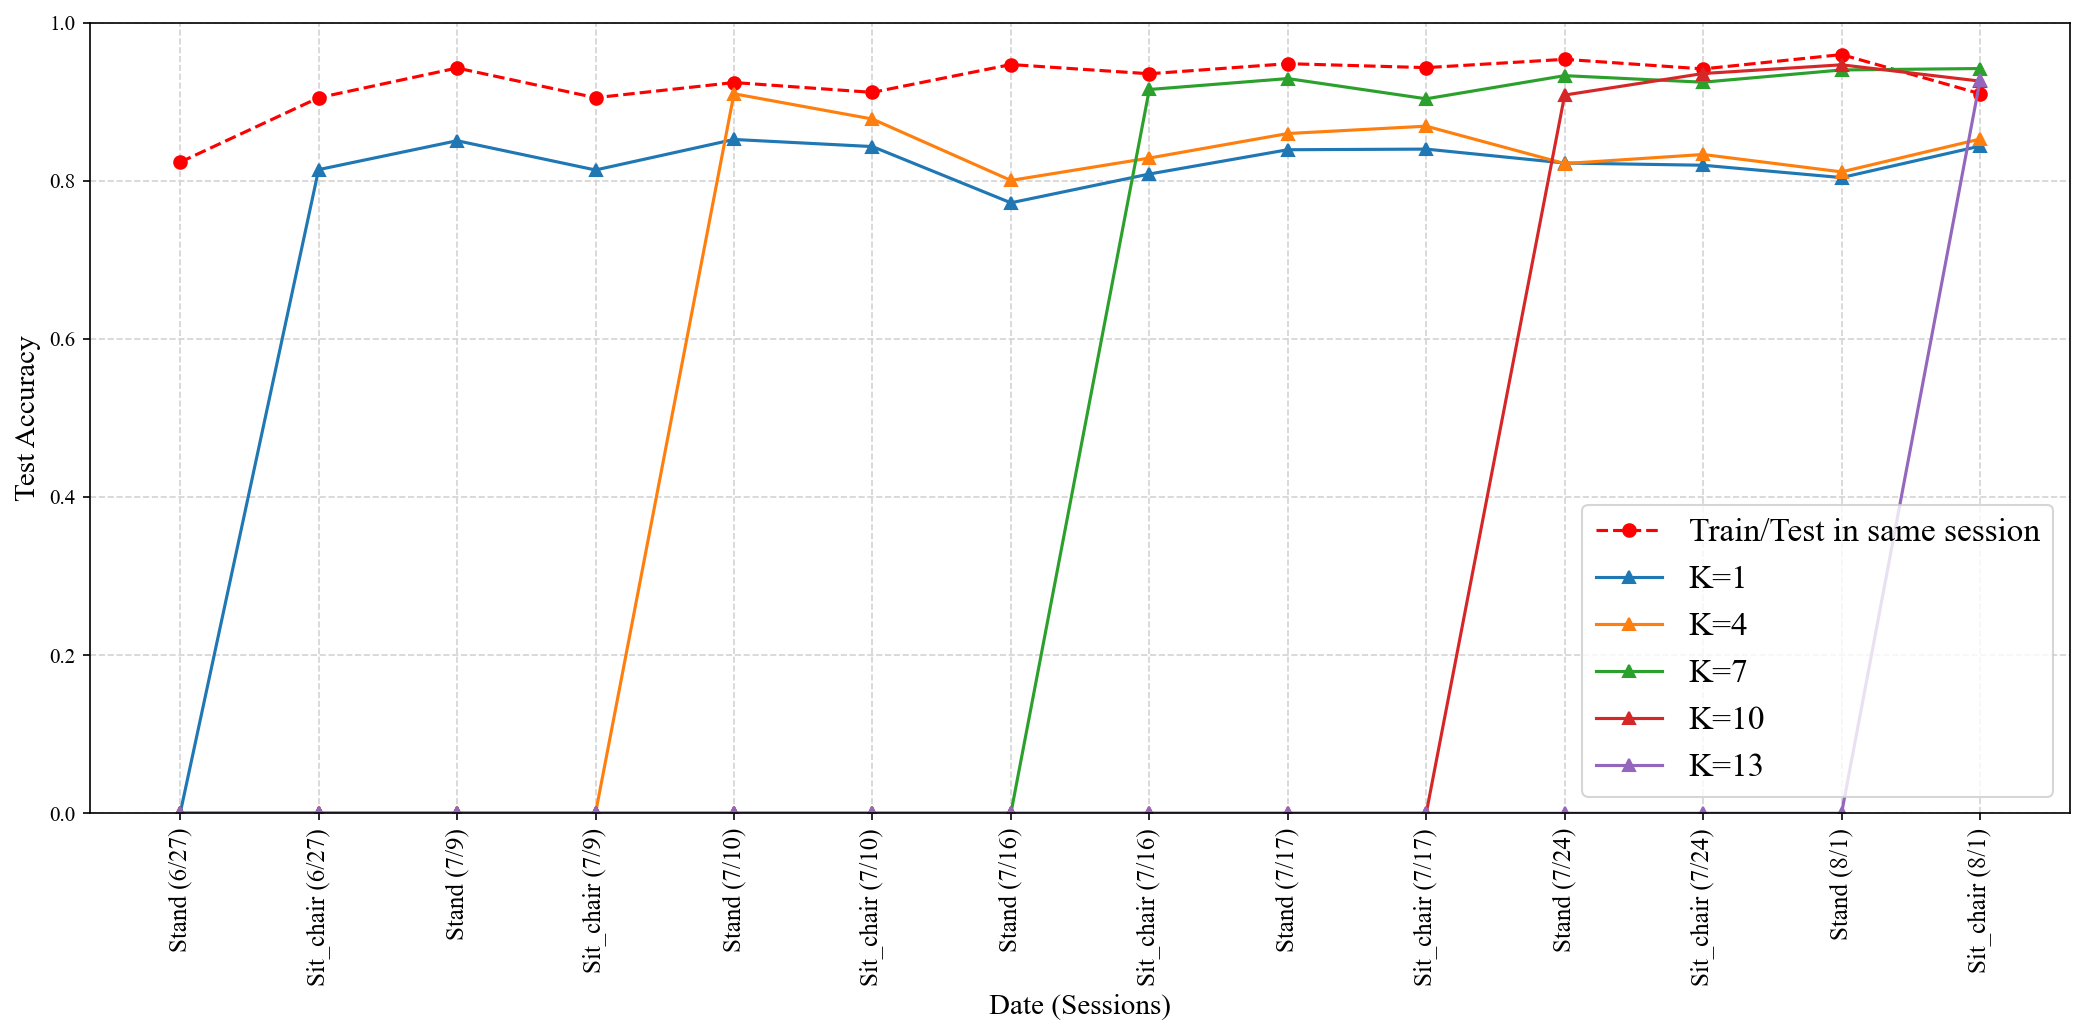

In [7]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.823392927646637, 0.904861569404602, 0.9424460530281067, 0.9048944711685181, 0.9240977764129639, 0.9116214513778687, 0.946840763092041, 0.9351787567138672, 0.947931170463562, 0.9429366588592529, 0.9534506797790527, 0.9413134455680847, 0.959462583065033, 0.9099767804145813]

X_labels = ['Stand (6/27)', 'Sit_chair (6/27)', 'Stand (7/9)', 'Sit_chair (7/9)', 'Stand (7/10)', 'Sit_chair (7/10)',
            'Stand (7/16)', 'Sit_chair (7/16)', 'Stand (7/17)', 'Sit_chair (7/17)', 'Stand (7/24)', 'Sit_chair (7/24)', 'Stand (8/1)', 'Sit_chair (8/1)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1, loc='lower right')
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()